In [21]:
! [ -e /content ] && pip install -Uqq fastbook


In [22]:
from google.colab import files

uploaded = files.upload()

Saving colab_keys.json to colab_keys (1).json


In [23]:
import os
import json
from fastbook import search_images_bing, download_url

if uploaded:
  api_key = json.loads(uploaded.get('colab_keys.json')).get('AZURE_API_KEY')
else:
  api_key = os.environ.get("AZURE_API_KEY", 'XXX')


In [24]:
from fastai.vision.all import *
from fastbook import *
path = untar_data(URLs.PETS)

In [25]:
Path.BASE_PATH = path
path.ls()

(#2) [Path('images'),Path('annotations')]

In [26]:
(path/'images').ls()

(#7393) [Path('images/newfoundland_178.jpg'),Path('images/saint_bernard_16.jpg'),Path('images/Ragdoll_53.jpg'),Path('images/Abyssinian_164.jpg'),Path('images/miniature_pinscher_134.jpg'),Path('images/english_cocker_spaniel_96.jpg'),Path('images/miniature_pinscher_149.jpg'),Path('images/Abyssinian_67.jpg'),Path('images/Sphynx_245.jpg'),Path('images/basset_hound_144.jpg')...]

In [27]:
fname = (path/'images').ls()[0]
re.findall(r'(.+)_\d+.jpg$', fname.name)


['newfoundland']

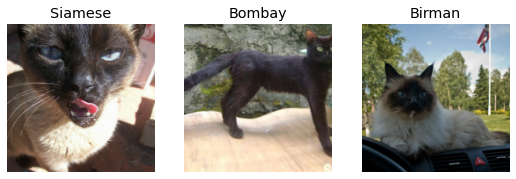

In [28]:
pets = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(seed=42),
    get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224, min_scale=0.75)
)

dls = pets.dataloaders(path/'images')
dls.show_batch(nrows=1, ncols=3)

In [29]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time


KeyboardInterrupt: ignored